# The Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
disney_df = pd.read_csv("DisneylandReviews.csv", encoding='latin-1')

In [3]:
disney_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [4]:
disney_df.dtypes

Review_ID             int64
Rating                int64
Year_Month           object
Reviewer_Location    object
Review_Text          object
Branch               object
dtype: object

In [5]:
disney_df.shape

(42656, 6)

# Pre-Processing The Data

In [6]:
disney_df = disney_df.dropna(axis=0) #remove all null values

In [7]:
disney_df.drop_duplicates() #remove all duplicates

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [8]:
# Remove all "missing" values
disney_df = disney_df[disney_df.Review_ID != "missing"]
disney_df = disney_df[disney_df.Rating != "missing"]
disney_df = disney_df[disney_df.Year_Month != "missing"]
disney_df = disney_df[disney_df.Reviewer_Location != "missing"]
disney_df = disney_df[disney_df.Review_Text != "missing"]
disney_df = disney_df[disney_df.Branch != "missing"]

In [9]:
disney_df.shape

(40043, 6)

In [10]:
# Create "Year" column with just the year of the review
disney_df['Year'] = disney_df.Year_Month.str[:4]

In [11]:
# Create the "Month" column with just the month of the review
disney_df['Month'] = disney_df.Year_Month.str[5:]

In [12]:
disney_df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


# Modeling

In [13]:
import seaborn as sns

Number of Ratings

<AxesSubplot:xlabel='Rating', ylabel='count'>

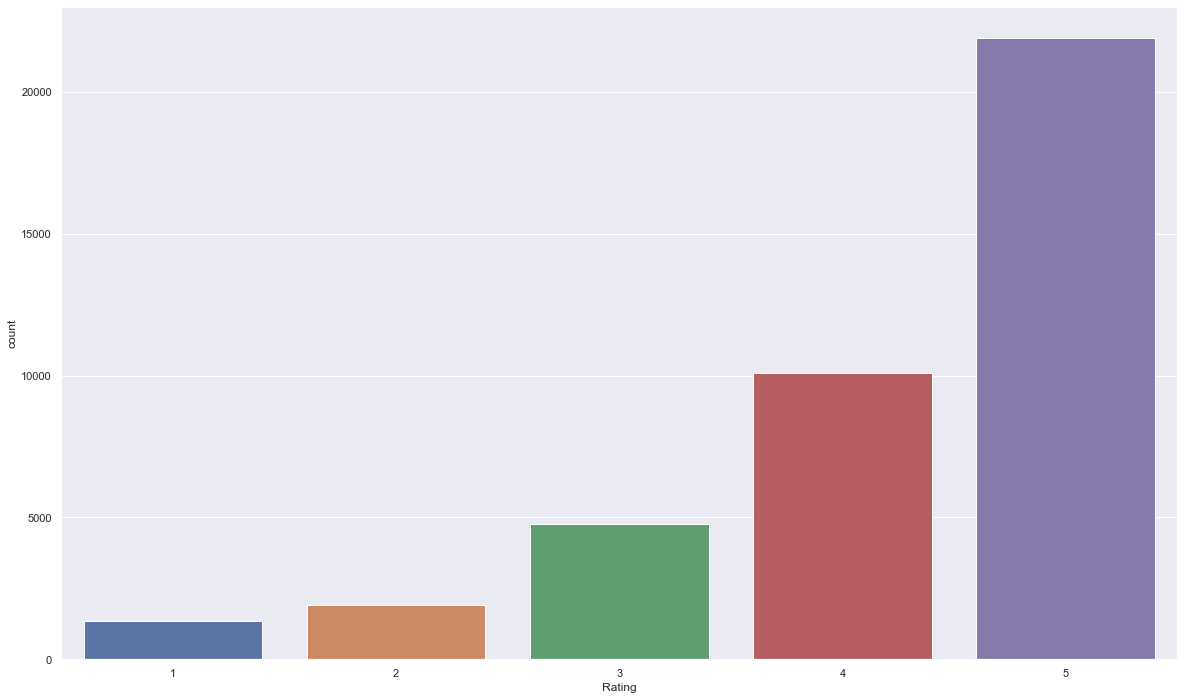

In [15]:
sns.set(rc={"figure.figsize":(20,12)})
sns.countplot(data=disney_df, x='Rating')

Ratings Over Time

<AxesSubplot:xlabel='Year', ylabel='Rating'>

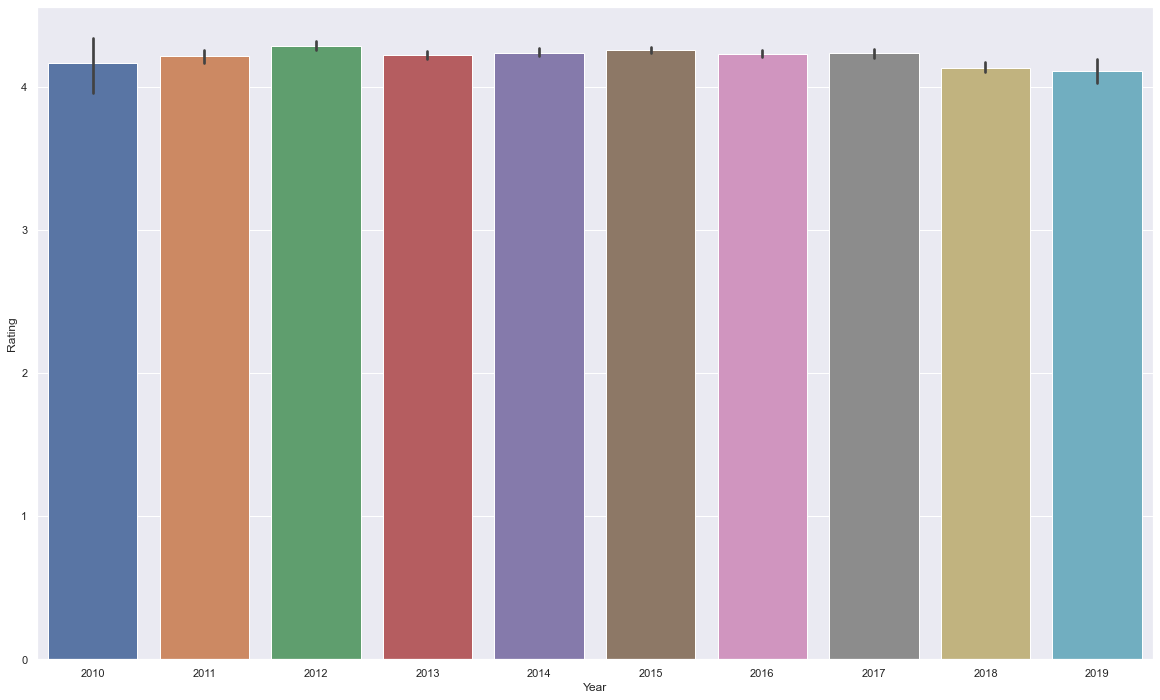

In [16]:
order = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]
sns.set(rc={"figure.figsize":(20,12)})
sns.barplot(data=disney_df, x='Year', y='Rating', order=order)

Branch Ratings

<AxesSubplot:xlabel='Branch', ylabel='Rating'>

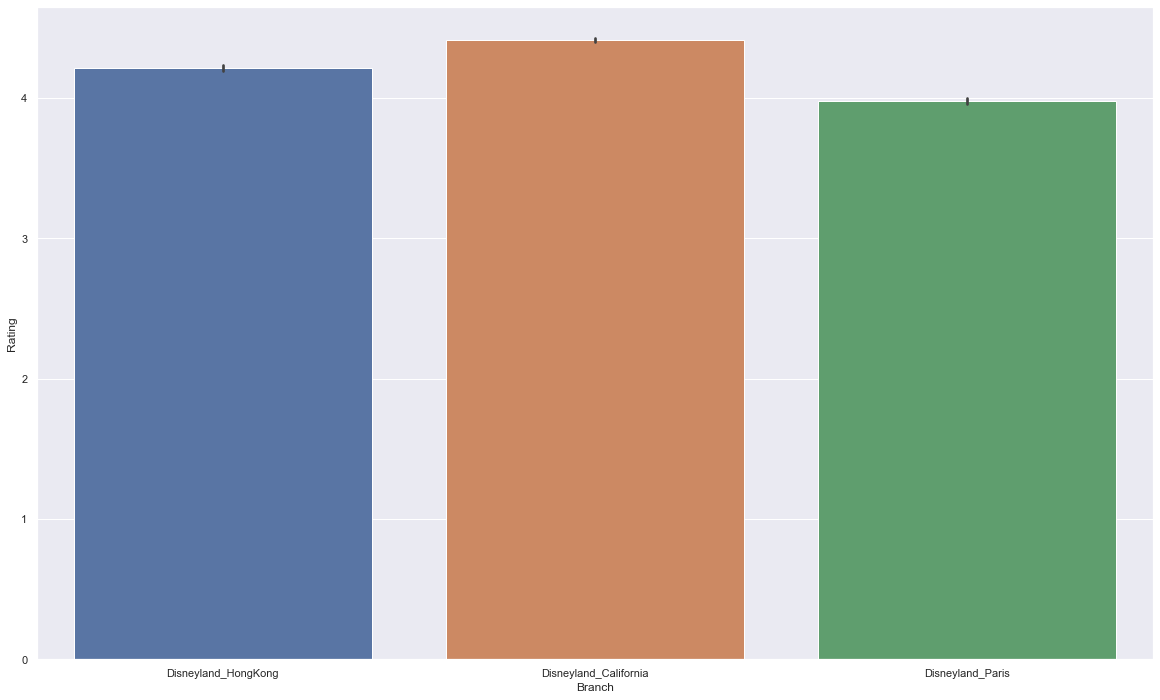

In [17]:
sns.set(rc={"figure.figsize":(20,12)})
sns.barplot(data=disney_df, x='Branch', y='Rating')

Most Recent Ratings (2019)

<AxesSubplot:xlabel='Rating', ylabel='count'>

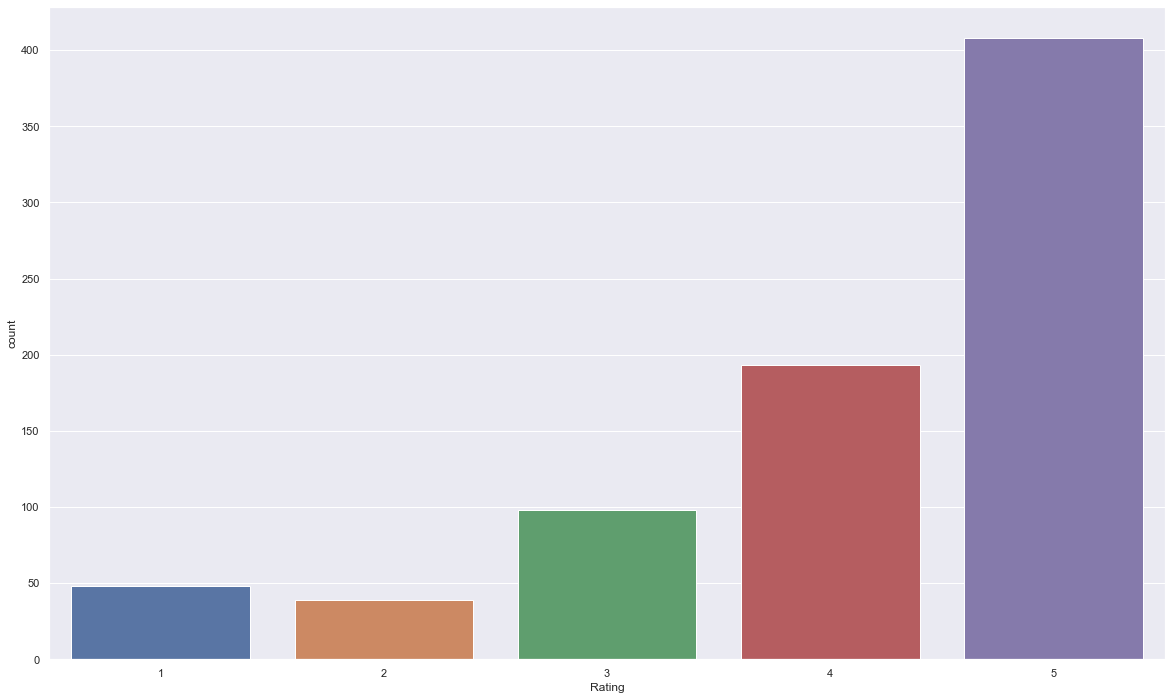

In [18]:
sns.countplot(data=disney_df[disney_df['Year'] == '2019'], x= 'Rating')

Highest Rated Year (2012)

<AxesSubplot:xlabel='Rating', ylabel='count'>

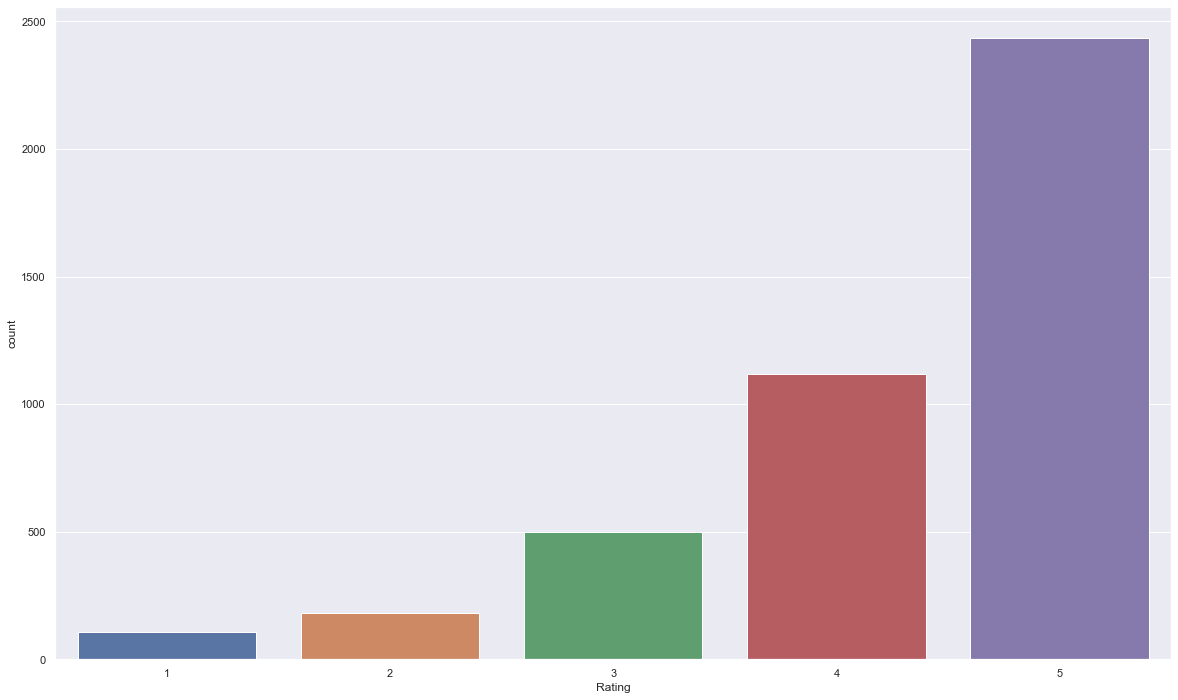

In [19]:
sns.countplot(data=disney_df[disney_df['Year'] == "2012"], x='Rating')

# K-Means Clustering

In [20]:
disney_df.columns

Index(['Review_ID', 'Rating', 'Year_Month', 'Reviewer_Location', 'Review_Text',
       'Branch', 'Year', 'Month'],
      dtype='object')

In [21]:
df = disney_df[['Review_Text','Rating', 'Branch']]

In [22]:
df.head()

,Review_Text,Rating,Branch
0,If you've ever been to Disneyland anywhere you...,4,Disneyland_HongKong
1,Its been a while since d last time we visit HK...,4,Disneyland_HongKong
2,Thanks God it wasn t too hot or too humid wh...,4,Disneyland_HongKong
3,HK Disneyland is a great compact park. Unfortu...,4,Disneyland_HongKong
4,"the location is not in the city, took around 1...",4,Disneyland_HongKong


In [23]:
!pip install nltk

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [25]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HEJoh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HEJoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
sentiment = SentimentIntensityAnalyzer()

In [27]:
sample = df[0:3]['Review_Text']

In [28]:
for s in sample:
    print(s)
    ss = sentiment.polarity_scores(s)
    print(ss)
    print('---------------------------------------')

If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. 
{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.7069}
---------------------------------------
Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel lik

In [29]:
# Import stop words and apply to clean up reviews text
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [30]:
df['no_stopwords_reviews'] = df['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\Users\HEJoh\AppData\Local\Temp\ipykernel_16212\2258313939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stopwords_reviews'] = df['Review_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [31]:
sample = df[0:3]['no_stopwords_reviews']

# Get sentiment analysis of text
for s in sample:
    print(s)
    ss = sentiment.polarity_scores(s)
    print(ss)
    print('---------------------------------------')

If ever Disneyland anywhere find Disneyland Hong Kong similar layout walk main street! It familiar feel. One rides Small World absolutely fabulous worth doing. The day visited fairly hot relatively busy queues moved fairly well.
{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.8054}
---------------------------------------
Its since last time visit HK Disneyland .. Yet, time stay Tomorrowland .. AKA Marvel land!Now Iron Man Experience n Newly open Ant Man n Wasp!!Ironman .. Great feature n Exciting, especially whole scenery HK (HK central area Kowloon)!Antman .. Changed previous Buzz lightyear! More less same, I'm expecting something most!!However, boys like it!!Space Mountain .. Turns Star Wars!! This 1 Great!!!For cast members (staffs) .. Felt bit MINUS point before!!! Just dun feel like Disney brand!! Seems local like Ocean Park even worst!!They got SMILING face, wanna u enter n attraction n leave!!Hello supposed Happiest Place Earth brand!! But, really Dont feel it!!Bakery Mai

In [32]:
# Add neg neu pos and compound to dataset
df['neg'] = df['no_stopwords_reviews'].apply(lambda x: sentiment.polarity_scores(x)['neg'])
df['neu'] = df['no_stopwords_reviews'].apply(lambda x: sentiment.polarity_scores(x)['neu'])
df['pos'] = df['no_stopwords_reviews'].apply(lambda x: sentiment.polarity_scores(x)['pos'])
df['compound'] = df['no_stopwords_reviews'].apply(lambda x: sentiment.polarity_scores(x)['compound'])

C:\Users\HEJoh\AppData\Local\Temp\ipykernel_16212\950950532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neg'] = df['no_stopwords_reviews'].apply(lambda x: sentiment.polarity_scores(x)['neg'])
C:\Users\HEJoh\AppData\Local\Temp\ipykernel_16212\950950532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neu'] = df['no_stopwords_reviews'].apply(lambda x: sentiment.polarity_scores(x)['neu'])
C:\Users\HEJoh\AppData\Local\Temp\ipykernel_16212\950950532.py:4: SettingWithCopyWarning: 
A value is tr

In [33]:
df.head()

,Review_Text,Rating,Branch,no_stopwords_reviews,neg,neu,pos,compound
0,If you've ever been to Disneyland anywhere you...,4,Disneyland_HongKong,If ever Disneyland anywhere find Disneyland Ho...,0.000,0.795,0.205,0.8054
1,Its been a while since d last time we visit HK...,4,Disneyland_HongKong,Its since last time visit HK Disneyland .. Yet...,0.017,0.745,0.238,0.9791
2,Thanks God it wasn t too hot or too humid wh...,4,Disneyland_HongKong,Thanks God hot humid I visiting park otherwise...,0.021,0.660,0.319,0.9859
3,HK Disneyland is a great compact park. Unfortu...,4,Disneyland_HongKong,HK Disneyland great compact park. Unfortunatel...,0.094,0.657,0.250,0.8739
4,"the location is not in the city, took around 1...",4,Disneyland_HongKong,"location city, took around 1 hour Kowlon, kids...",0.000,0.777,0.223,0.5106


In [37]:
import matplotlib.pyplot as plt

In [38]:
# Determine the K Value for number of clusters
from sklearn.cluster import KMeans

In [39]:
X = df[['neg','neu','pos','compound']]

Text(0, 0.5, 'Variance')

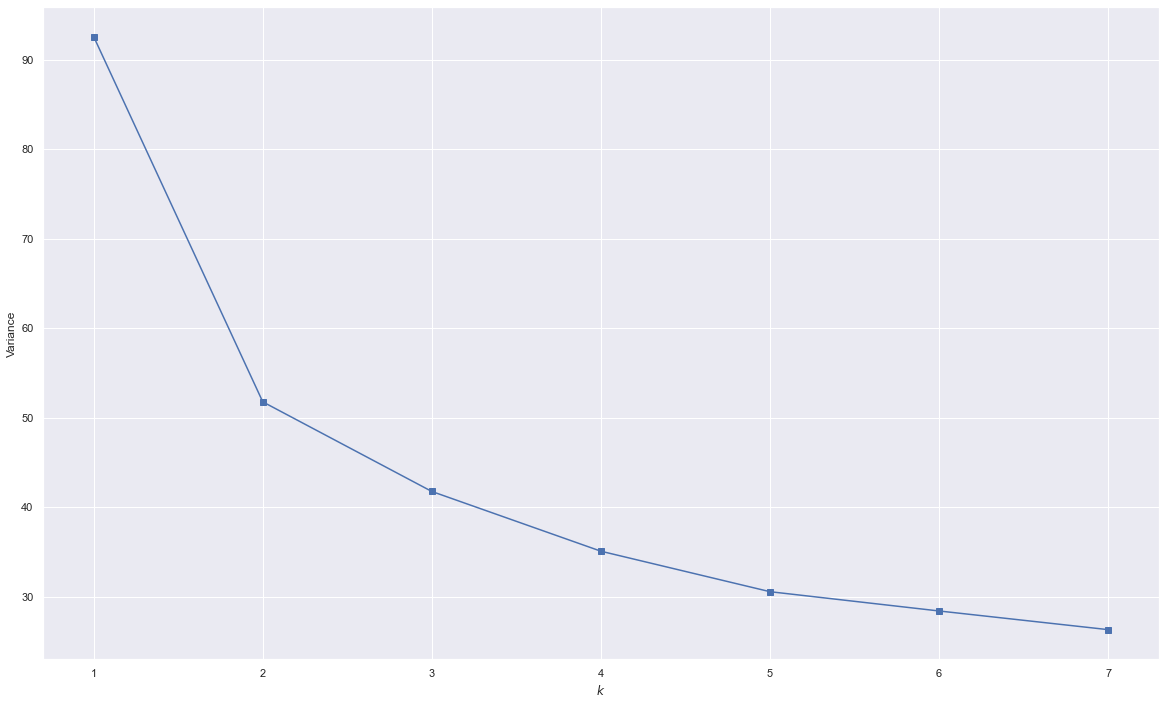

In [40]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [41]:
kmeans = KMeans(n_clusters = 3, random_state = 1).fit(X)

In [42]:
y = kmeans.fit_predict(X)

In [43]:
# Add cluster values to data
df['cluster'] = y

In [44]:
df.head()

,Review_Text,Rating,Branch,no_stopwords_reviews,neg,neu,pos,compound,cluster
0,If you've ever been to Disneyland anywhere you...,4,Disneyland_HongKong,If ever Disneyland anywhere find Disneyland Ho...,0.000,0.795,0.205,0.8054,1
1,Its been a while since d last time we visit HK...,4,Disneyland_HongKong,Its since last time visit HK Disneyland .. Yet...,0.017,0.745,0.238,0.9791,1
2,Thanks God it wasn t too hot or too humid wh...,4,Disneyland_HongKong,Thanks God hot humid I visiting park otherwise...,0.021,0.660,0.319,0.9859,1
3,HK Disneyland is a great compact park. Unfortu...,4,Disneyland_HongKong,HK Disneyland great compact park. Unfortunatel...,0.094,0.657,0.250,0.8739,1
4,"the location is not in the city, took around 1...",4,Disneyland_HongKong,"location city, took around 1 hour Kowlon, kids...",0.000,0.777,0.223,0.5106,2


Visualizing Clusters

<AxesSubplot:xlabel='neg', ylabel='pos'>

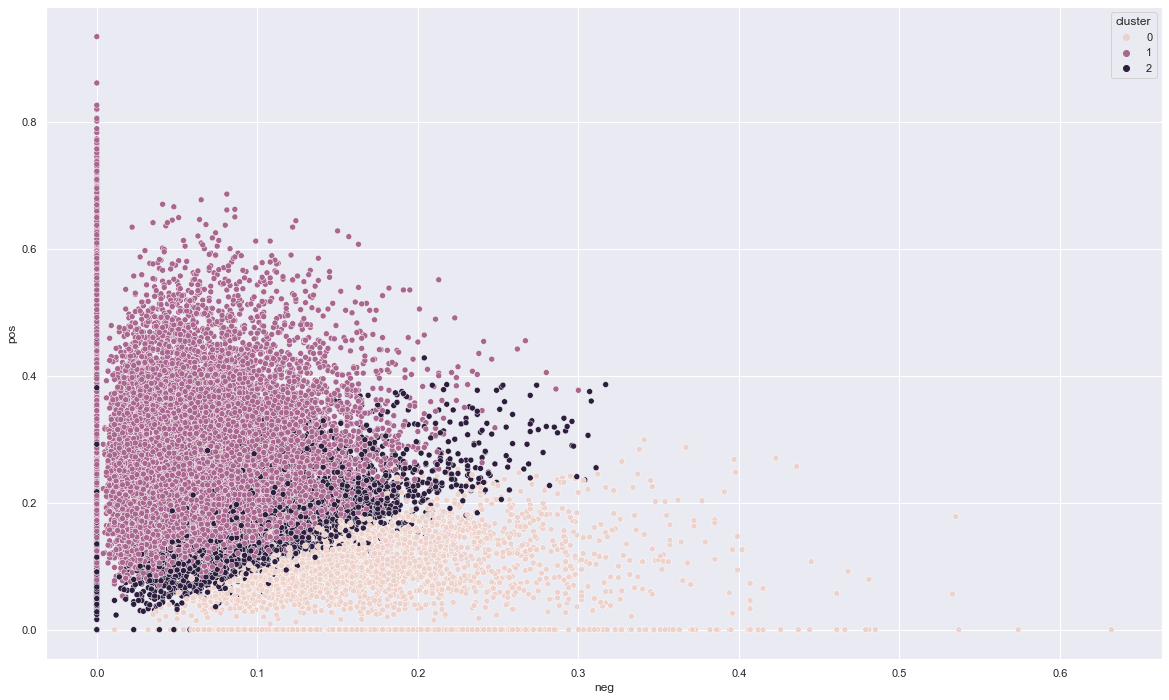

In [45]:
sns.scatterplot(x = df['neg'], y = df['pos'], hue=df['cluster'])

<AxesSubplot:xlabel='Branch', ylabel='compound'>

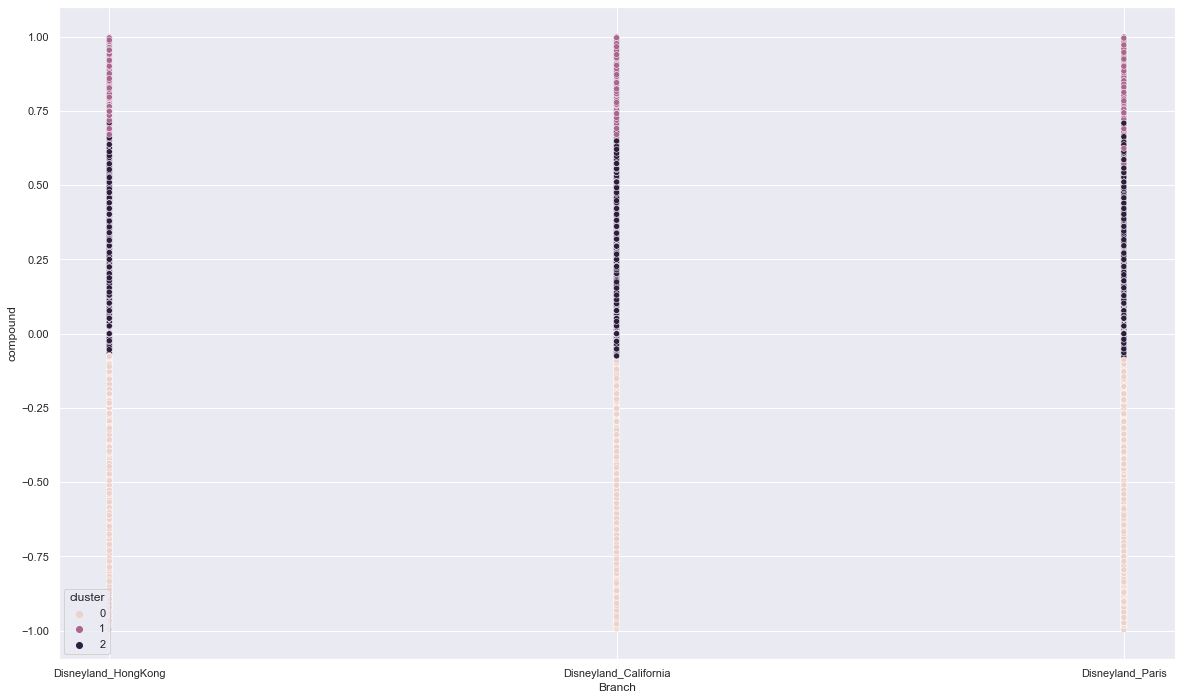

In [47]:
sns.scatterplot(x = df['Branch'], y = df['compound'], hue=df['cluster'])

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
model = vectorizer.fit_transform(df['no_stopwords_reviews'].str.upper())

In [50]:
km = KMeans(n_clusters=3)
km.fit(model)

terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(3):
    print("cluster %d:" %i,end='')
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind],end='')
    print()

cluster 0: disney disneyland world hong kong parks rides day paris florida
cluster 1: disneyland place great time rides kids fun day visit love
cluster 2: rides day time ride fast pass disney wait disneyland long


C:\Users\HEJoh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
